In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import os

In [2]:
sc.settings.verbosity = 3

# import data

In [5]:
## path to repository
os.chdir('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/scmultiome/')

In [6]:
adata_path='./data/adata_annotation.h5ad'
adata=sc.read_h5ad(adata_path)

In [7]:
markers=pd.read_csv('./data/markergenes.csv')
markers_dict=markers[['gene','germlayer']].groupby('germlayer',  sort=False)['gene'].apply(list).to_dict()

In [8]:
colori_samples={'Wild-type':"#00BA38", 'wt':"#00BA38",
                'E(z)-KD':"#619CFF","ez":"#619CFF", 
                'CBP-KD':"#F8766D","CBP":"#F8766D",'nej':"#F8766D"}

colori_germs= {
    'mesoderm': '#e24041',
    'anterioposterior_ectoderm' :'#182953',
    'dorsal_ectoderm' :'#277ea6',
    'neuroectoderm': '#3ac4e7',
    'ventral_ectoderm' :'#ab93c6',
    'anterior_endoderm': '#7ac143',
    'posterior_endoderm': '#40733e',
        'yolk' :'#efd129',
    'undifferentiated_cells': '#b22987',
    'pluripotent_progenitors' :'#ff9900'
}

# Fig 2 - UMAP wt annotation

In [11]:
adatawt=adata[adata.obs['sample']=='wt'].copy()
adatawt.obs['annotation_leiden12']=adatawt.obs['annotation_leiden12'].cat.remove_unused_categories()

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


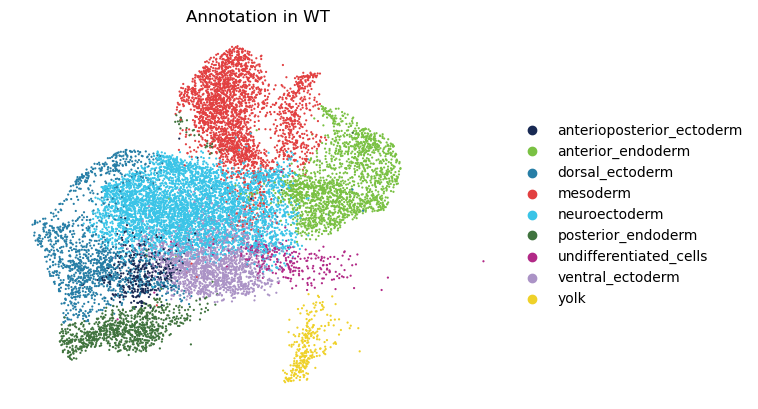

In [14]:
sc.pl.umap(adatawt, color='annotation_leiden12', size=10, 
           palette=colori_germs, frameon=False, title='Annotation in WT', 
          save='_germlayer_in_wt.pdf')

# Fig 3 - UMAP genotype and annotation

In [15]:
adata.obs['sample_name']=adata.obs['sample'].map({'wt':'Wild-type','ez':'E(z)-KD','nej':'CBP-KD'})

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


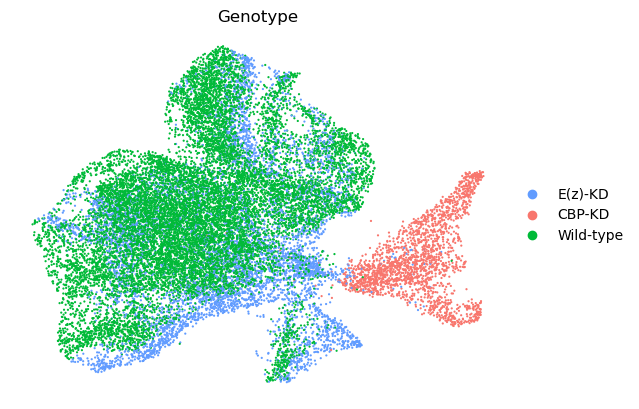

In [16]:
sc.pl.umap(adata, color=['sample_name'], size=10, palette=colori_samples,
           frameon=False, title=['Genotype'], 
          save='_genotype.pdf')

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


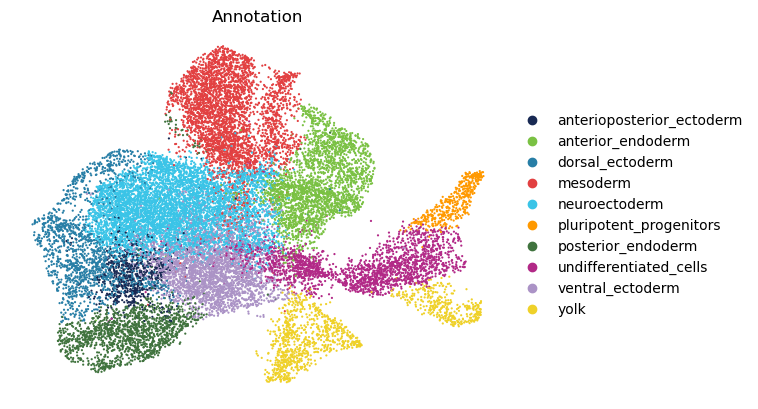

In [17]:
sc.pl.umap(adata, color=['annotation_leiden12'], size=10, palette=colori_germs,
           frameon=False, title=['Annotation'], 
          save='_annotation.pdf')

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


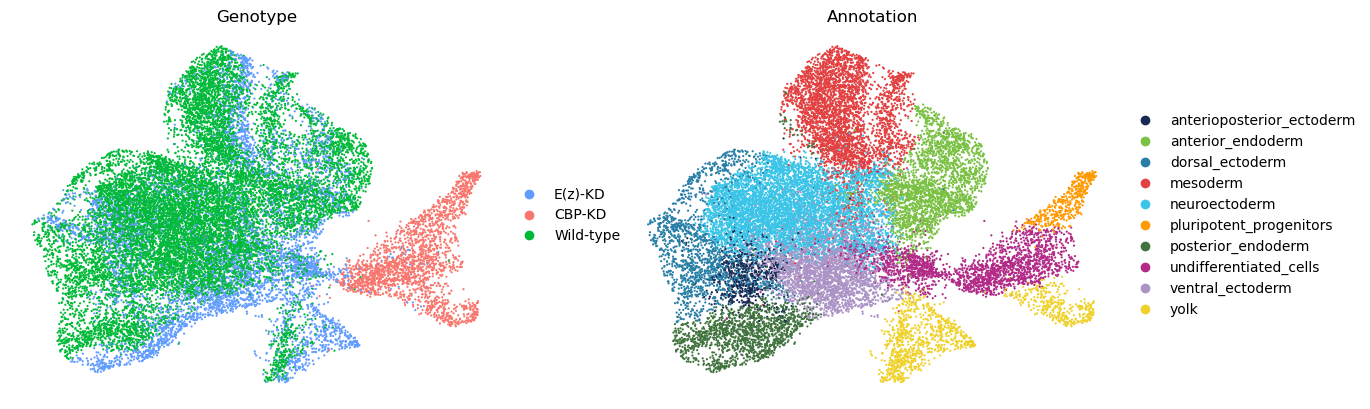

In [18]:
# in the same figure
sc.pl.umap(adata, color=['sample_name','annotation_leiden12'], size=10, 
           frameon=False, title=['Genotype','Annotation'])

# Fig 2 - GEX dotplot

In [19]:
# set gene symbol as index
adatawt.var['FB_id']=adatawt.var.index
adatawt.var.set_index('symbol',inplace=True)

In [20]:
# define legend bar color
cmap_greyred = matplotlib.colors.LinearSegmentedColormap.from_list("", list(sns.color_palette('Greys',7))[0:4]+['#d62728'])  

In [21]:
order_germ_wt=list(markers['germlayer'].unique())
order_germ_wt.append('undifferentiated_cells')

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


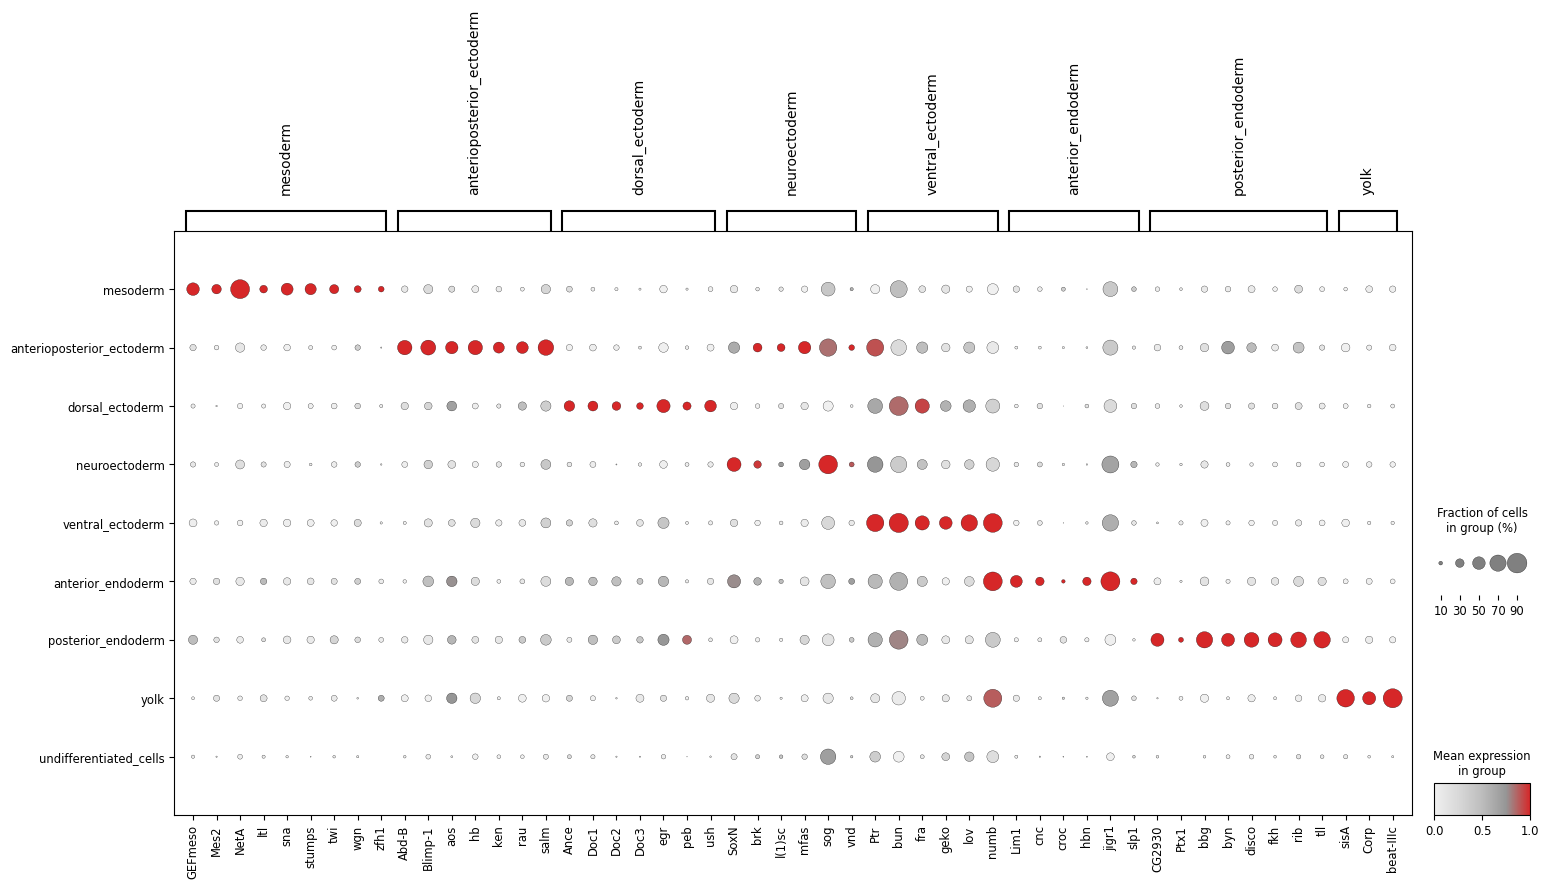

In [23]:
fig,axs=plt.subplots(1,1,figsize=(35/2,20/2))
sc.pl.dotplot(adatawt, var_names=markers_dict, groupby='annotation_leiden12', 
              cmap=cmap_greyred, standard_scale='var', 
              categories_order=order_germ_wt, ax=axs, 
          
               save='fig2_WT_RNA_dotplot.pdf'
                )

# Fig 2 - UMAP GEX

In [24]:
# import RNA assay 
adata=sc.read_h5ad('./data/adata_RNAassay_normalized.h5ad')

In [25]:
import matplotlib
cmap_greyred = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#EAEAEA",'#d62728']) # 'red'

In [26]:
def umap_samples(adata, genes):
    for gene in genes:
        try:
            fig, axs =plt.subplots(1, 3, figsize=(18,5 ))
            mx=5
            common_params=dict(color=gene, size=55, show=False ,cmap=cmap_greyred, vmin=0, vmax= mx, frameon=False)
            sc.pl.umap(adata[adata.obs['sample']=='wt'], ax=axs[0],  title='Wild-type - %s'%(gene), **common_params) 
            sc.pl.umap(adata[adata.obs['sample']=='ez'], ax=axs[1],  title='E(z)-KD - %s'%(gene), **common_params)
            sc.pl.umap(adata[adata.obs['sample']=='nej'], ax=axs[2], title='CBP-KD - %s'%(gene), **common_params)

           # plt.savefig('umap_x_sample_%s.pdf'%(gene))
    
        except:
            print('Error: %s not found'%(gene))

## Mes2 and Lim1

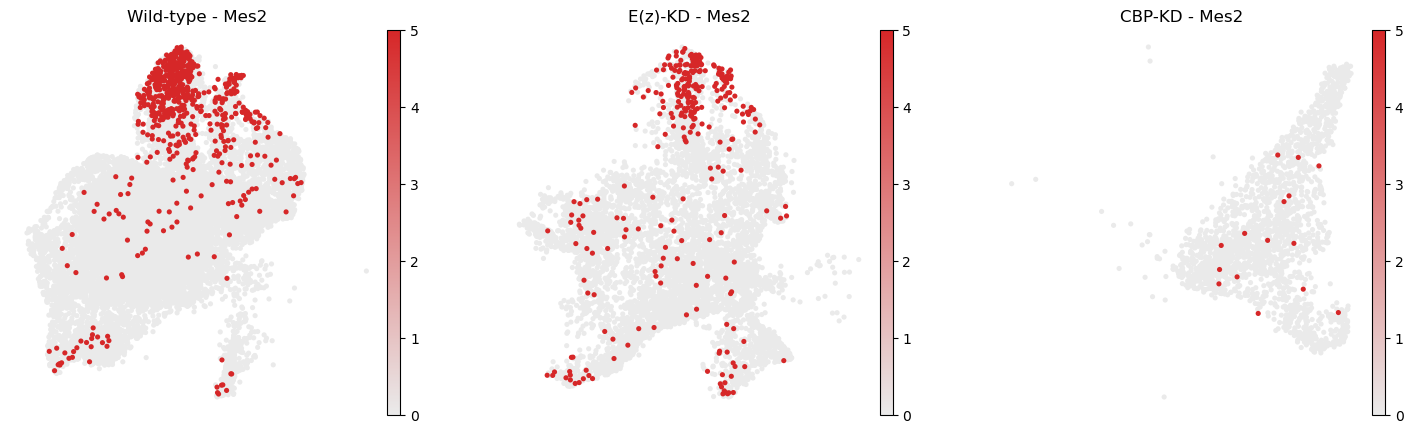

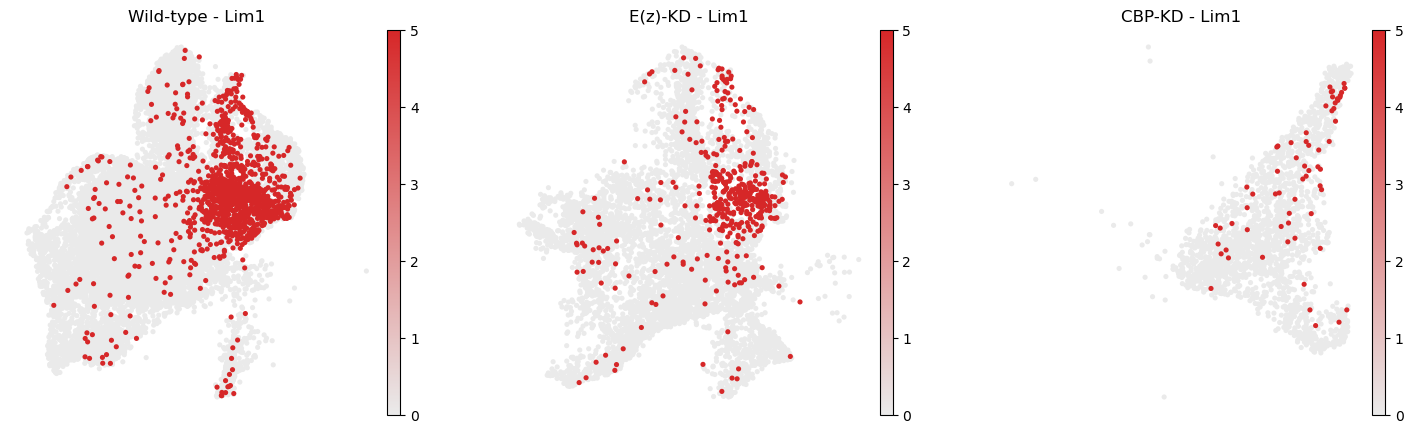

In [27]:
umap_samples(adata, ['Mes2','Lim1'])

## Ptx1 expression (Fig 4)

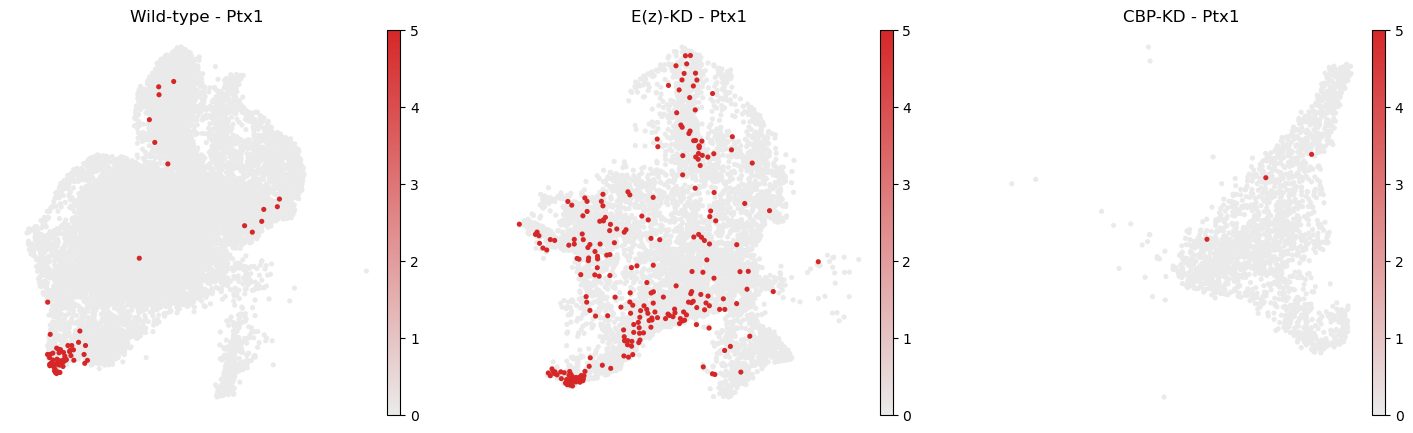

In [28]:
umap_samples(adata, ['Ptx1'])

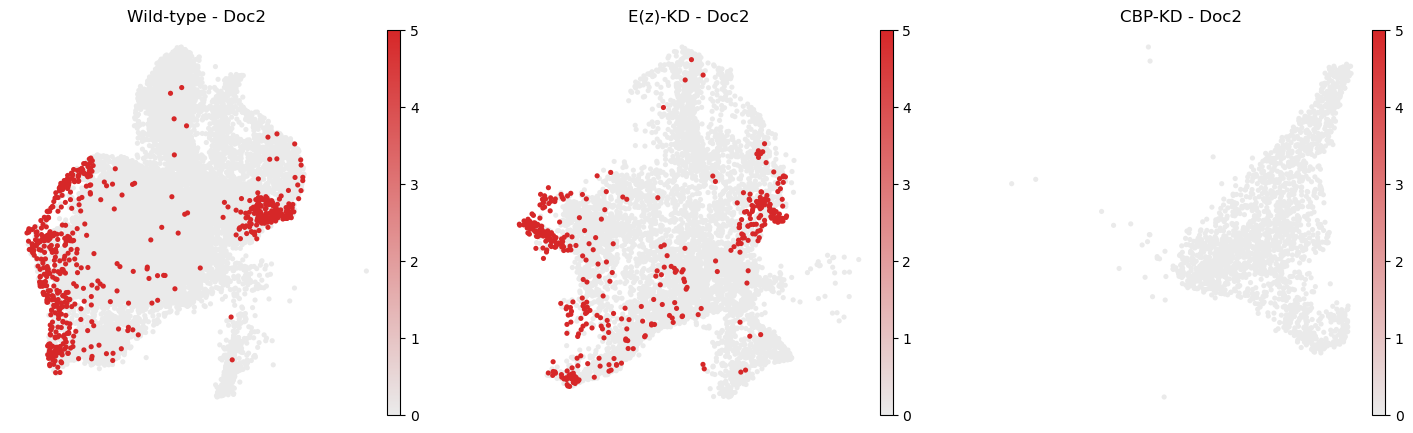

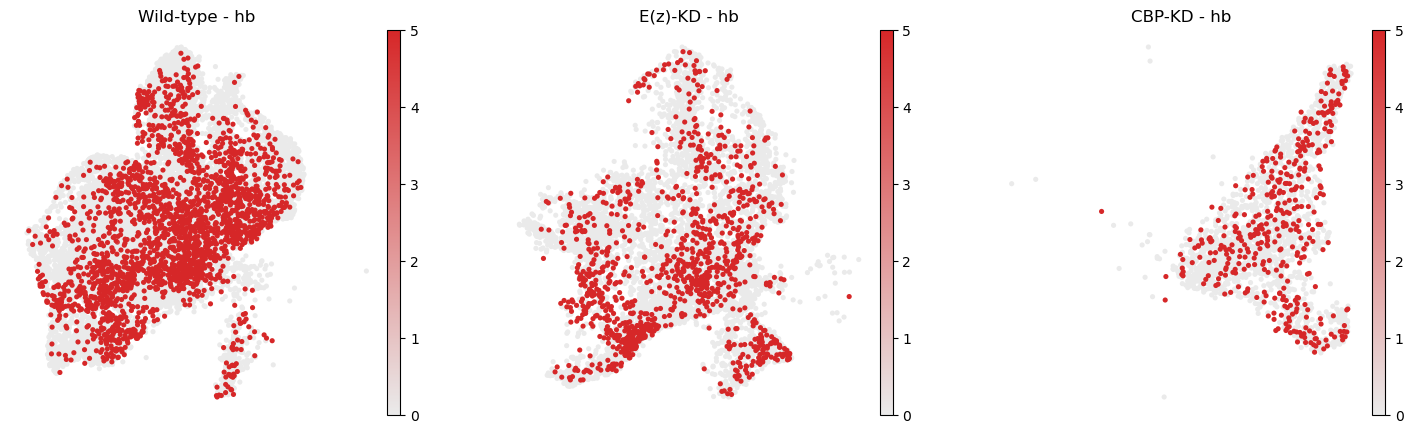

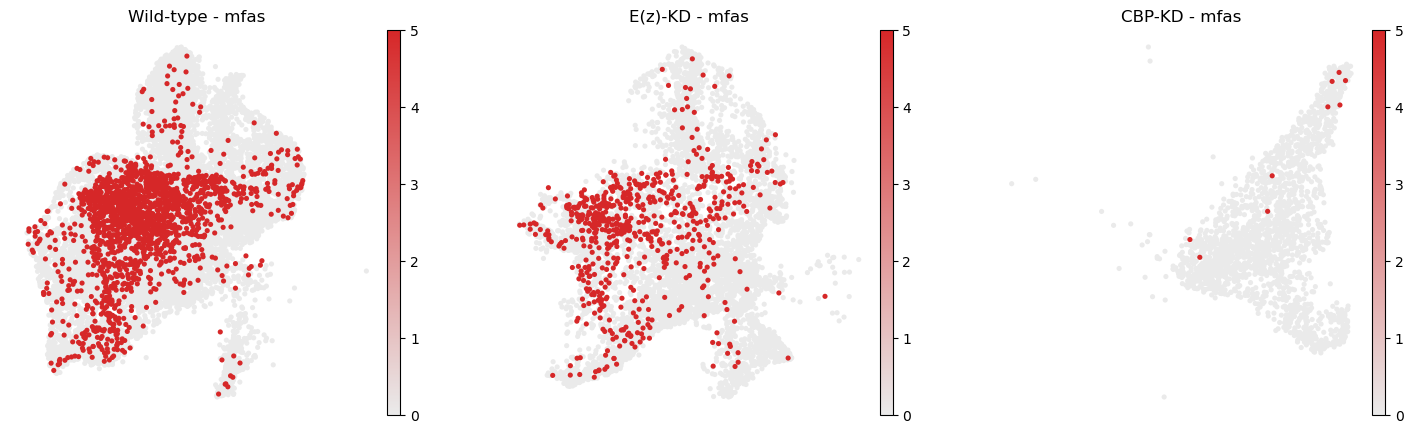

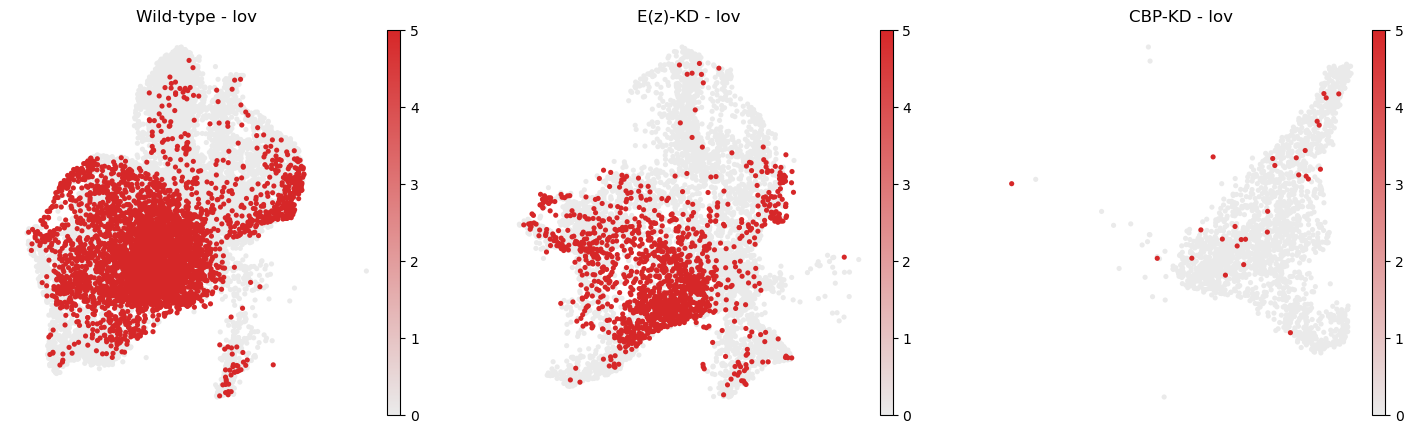

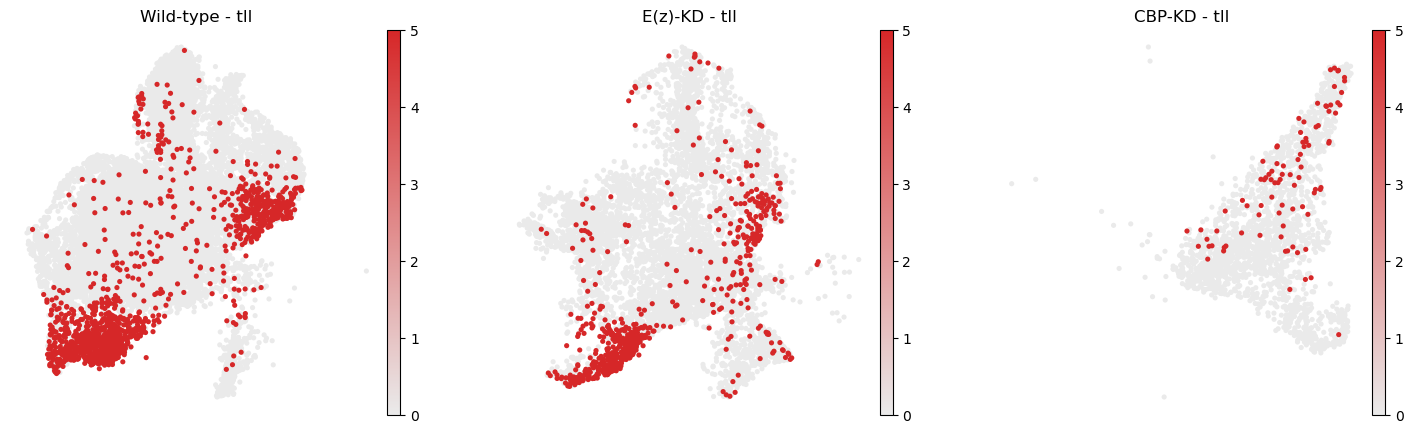

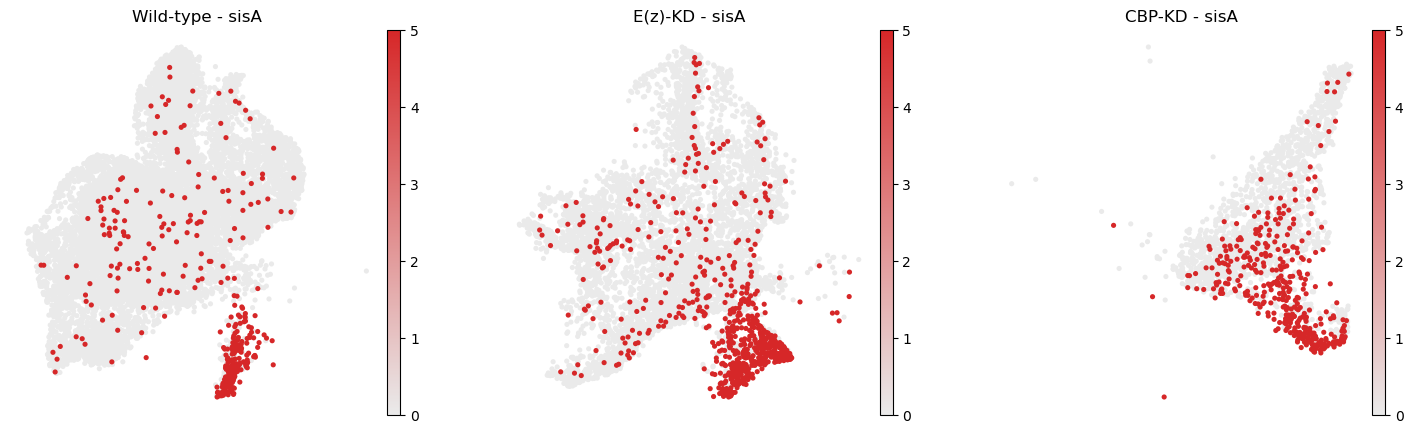

In [29]:
umap_samples(adata, [ 'Doc2', 'hb', 'mfas', 'lov', 'tll', 'sisA'])

# Fig 2 - Violin plot GEX 

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


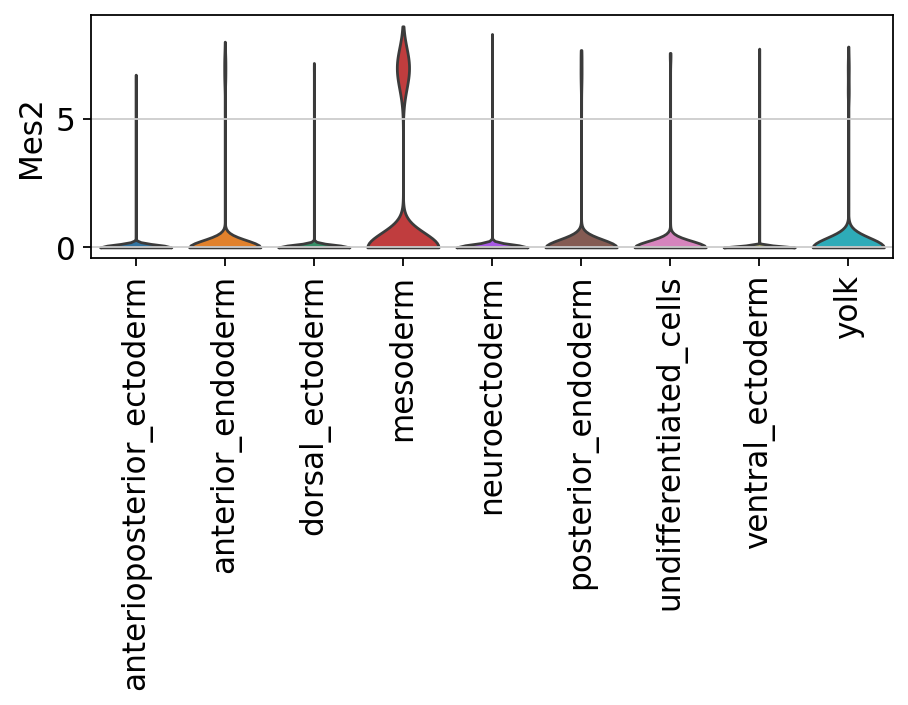

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


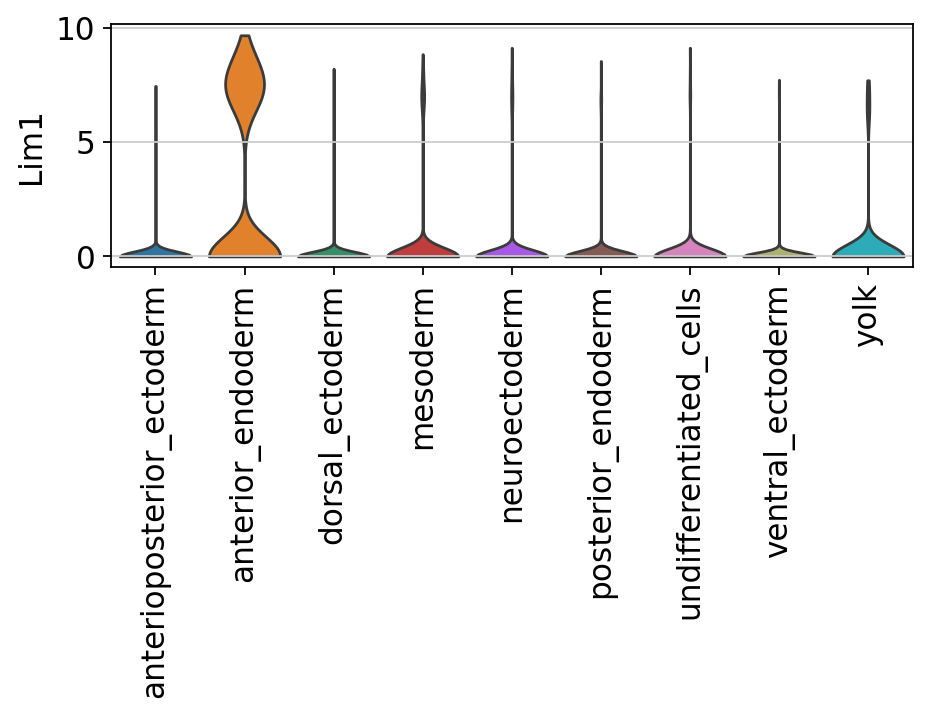

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


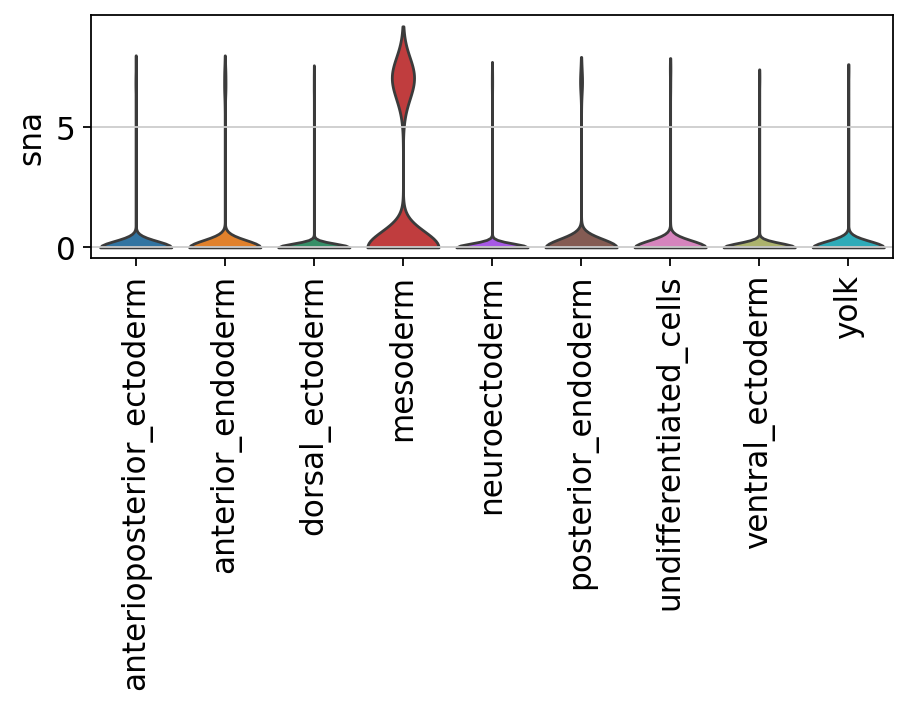

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


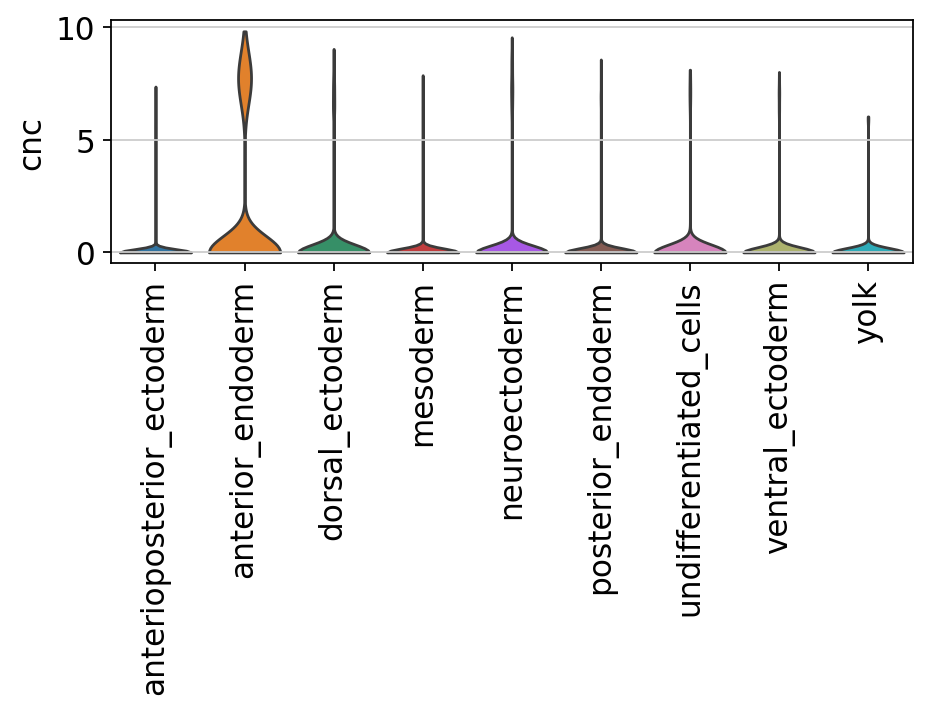

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


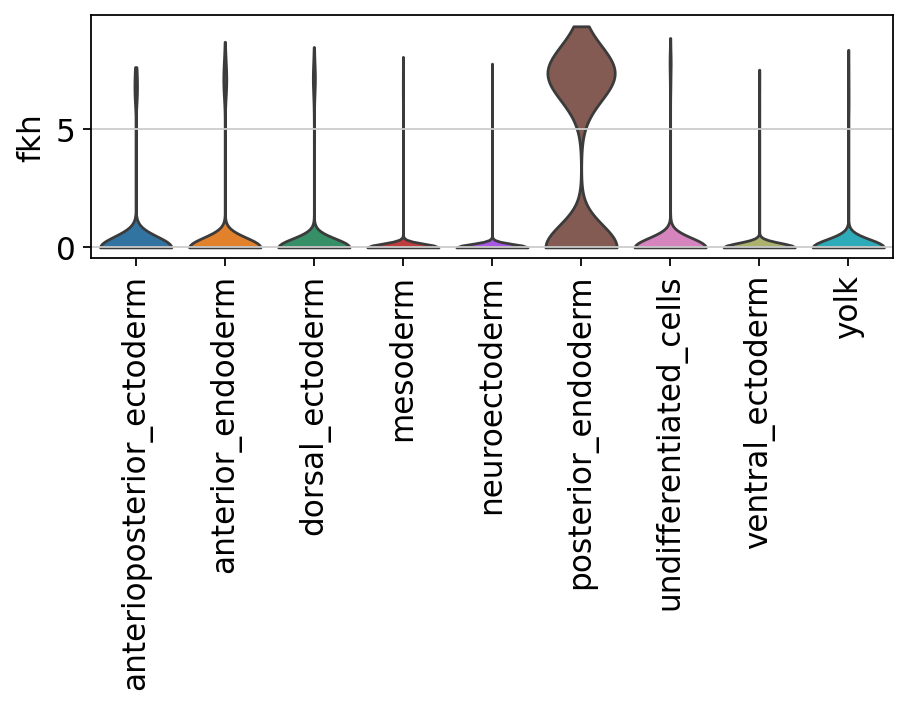

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


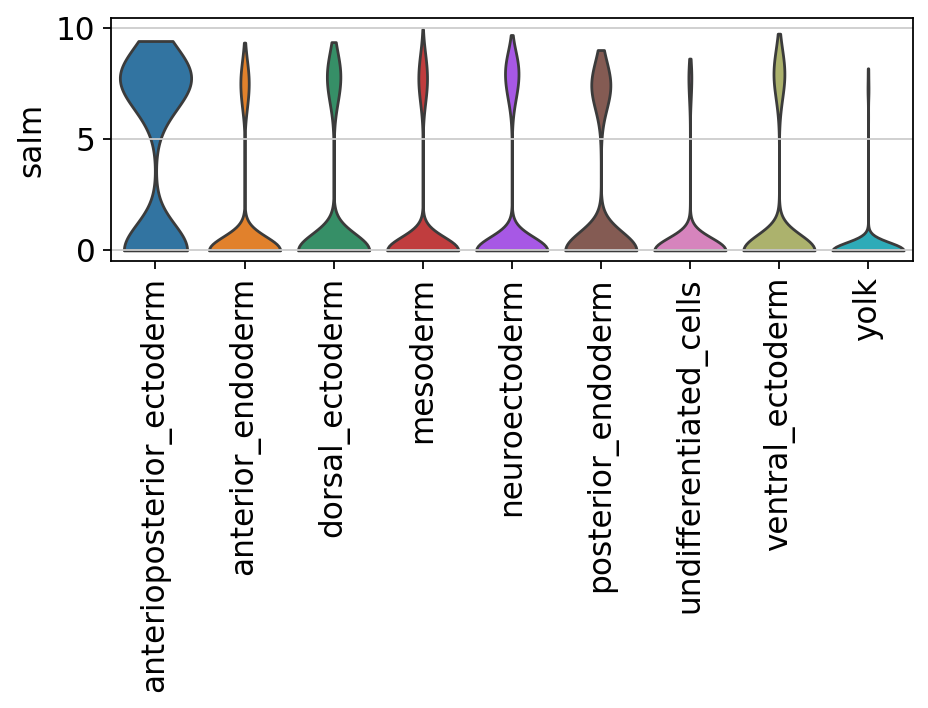

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


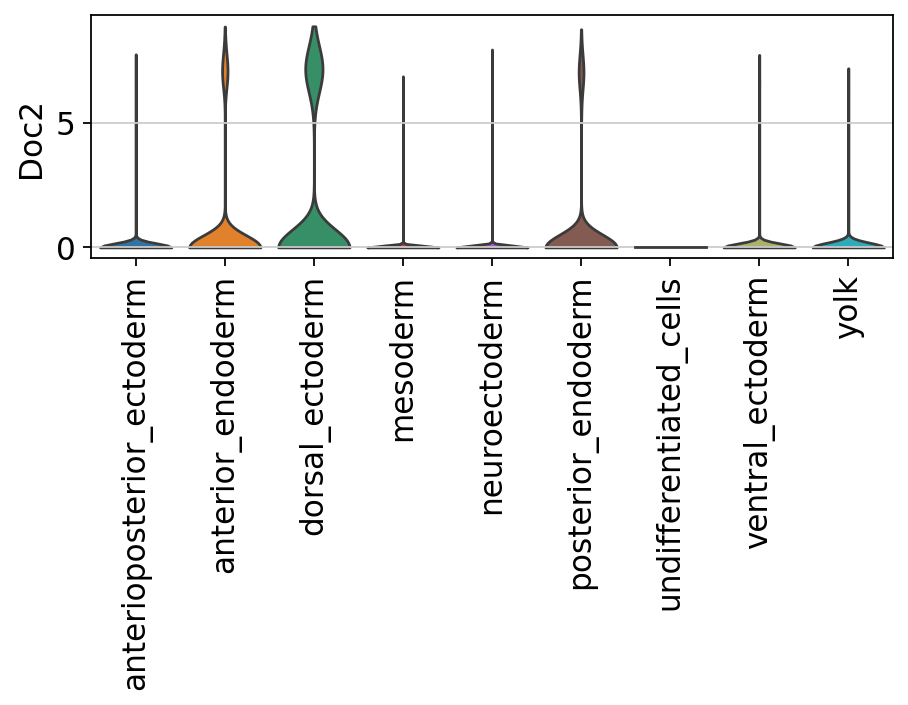

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


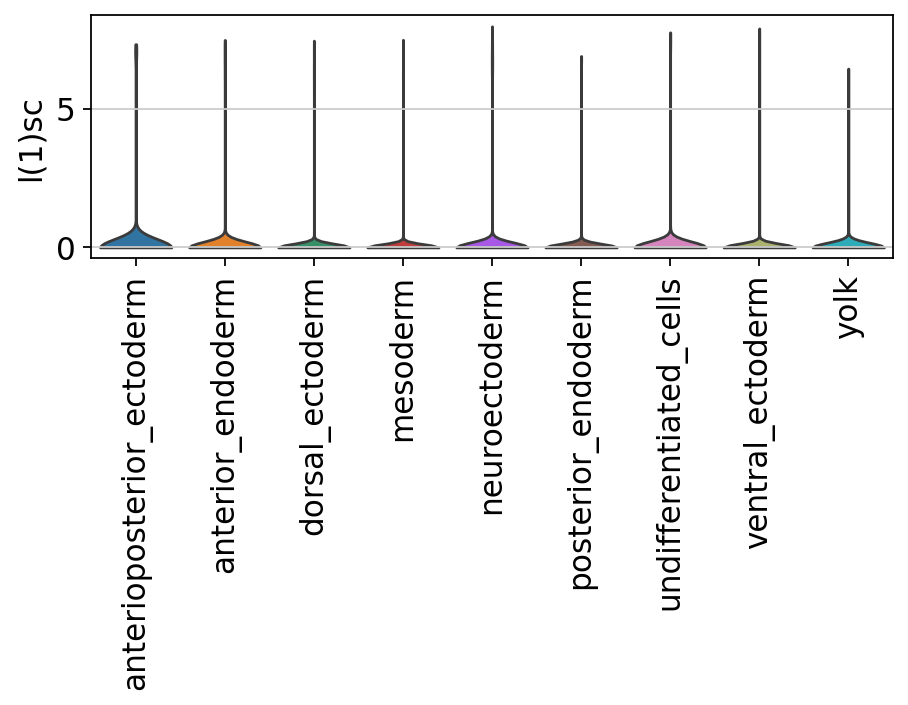

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


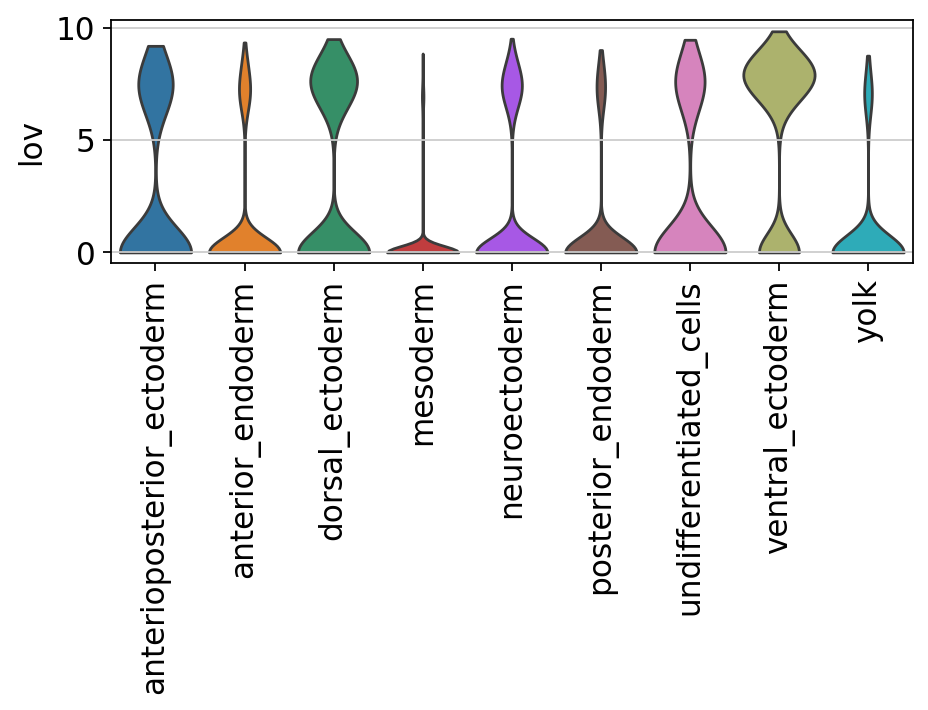

/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/hpcnfs/home/ieo6625/.conda/envs/myenv/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


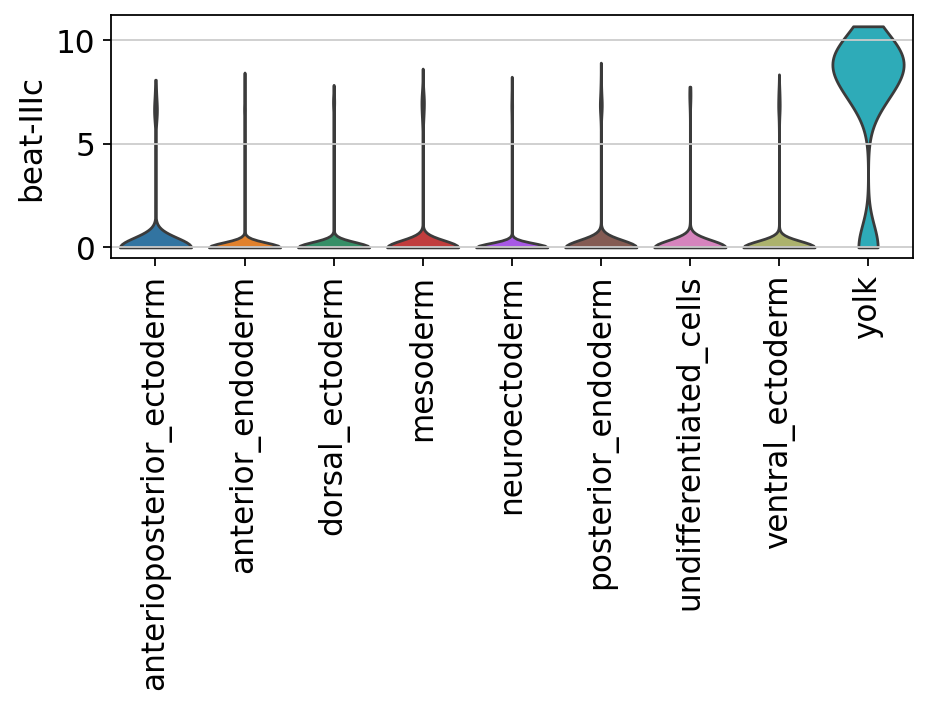

In [30]:
genes_for_violins=['Mes2','Lim1','sna', 'cnc','fkh', 'salm', 'Doc2', 'l(1)sc', 'lov', 'beat-IIIc']


sc.set_figure_params(figsize=(6,2))
for gn in genes_for_violins:
    sc.pl.violin(adata[adata.obs['sample']=='wt'], 
                 keys=gn, groupby='annotation_leiden12', #inner='box', 
                 stripplot=False, 
                rotation=90,
                #save='_wt_%s.pdf'%(gn)
                )

In [31]:
import session_info
session_info.show()